In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from benchmarks import *
from plotting import *
PROJECT_ROOT = os.path.abspath(os.getcwd() + os.sep + os.pardir)
BENCHMARKS_DIR = os.path.join(PROJECT_ROOT, "benchmarks")

In [27]:
from plotting import Plotter

TUNER = "RandomSearch"  # "Hyperband" or "BayesianOptimization" or "RandomSearch" or "origin"
MAX_EPOCHS = 500
MAX_TRIALS = 500
DESC = "Esperimenti"

#TUNER_STRING = TUNER + "." + str(MAX_EPOCHS) + "me" + str(MAX_TRIALS) + "mt." + DESC
TUNER_STRING = "GridSearch.5mt.Testing"
PATH = os.path.join(BENCHMARKS_DIR, TUNER_STRING + ".json")
#PATH = "/home/luca/tesi tmp/benchmarks.json"
#PATH = "/home/luca/RandomSearch.500me500mt.Esperimenti.json"

benchmarks = BenchmarksDB(load_path=PATH)
print(benchmarks.list_datasets())
print(benchmarks.list_classes())
print(benchmarks.list_experiments())
print(benchmarks.list_models())

plotter = Plotter(benchmarks, "/tmp/plots/Esperimenti")

datasets_by_input_dim = ['Libras', 'Epilepsy', 'CharacterTrajectories', 'ArticularyWordRecognition', 'JapaneseVowels', 'SpokenArabicDigits']

['Libras']
['Multiple SR Single Input Single Inter', 'Reference', 'Single SR Multiple Input Single Inter', 'Single SR Single Input Multiple Inter', 'Single SR Single Input Single Inter']
['Units 100']
['ESN', 'IIRESN']


In [29]:
# classes = ["Reference", "Single SR Single IS", "Single SR Single IS VSR", "Multiple SR Single IS", "Multiple SR Single IS VSR", "Multiple SR Multiple IS", "Multiple SR Multiple IS VSR"]
classes = ['Reference', 'Single SR Single Input Single Inter', 'Multiple SR Single Input Single Inter', 'Single SR Multiple Input Single Inter', 'Single SR Single Input Multiple Inter']

plotter.latex_table(datasets_by_input_dim, classes_order=classes)

/tmp/plots/Esperimenti/table.tex


In [ ]:
# plotter.histograms_summary()

KeyError: 'IRESN'

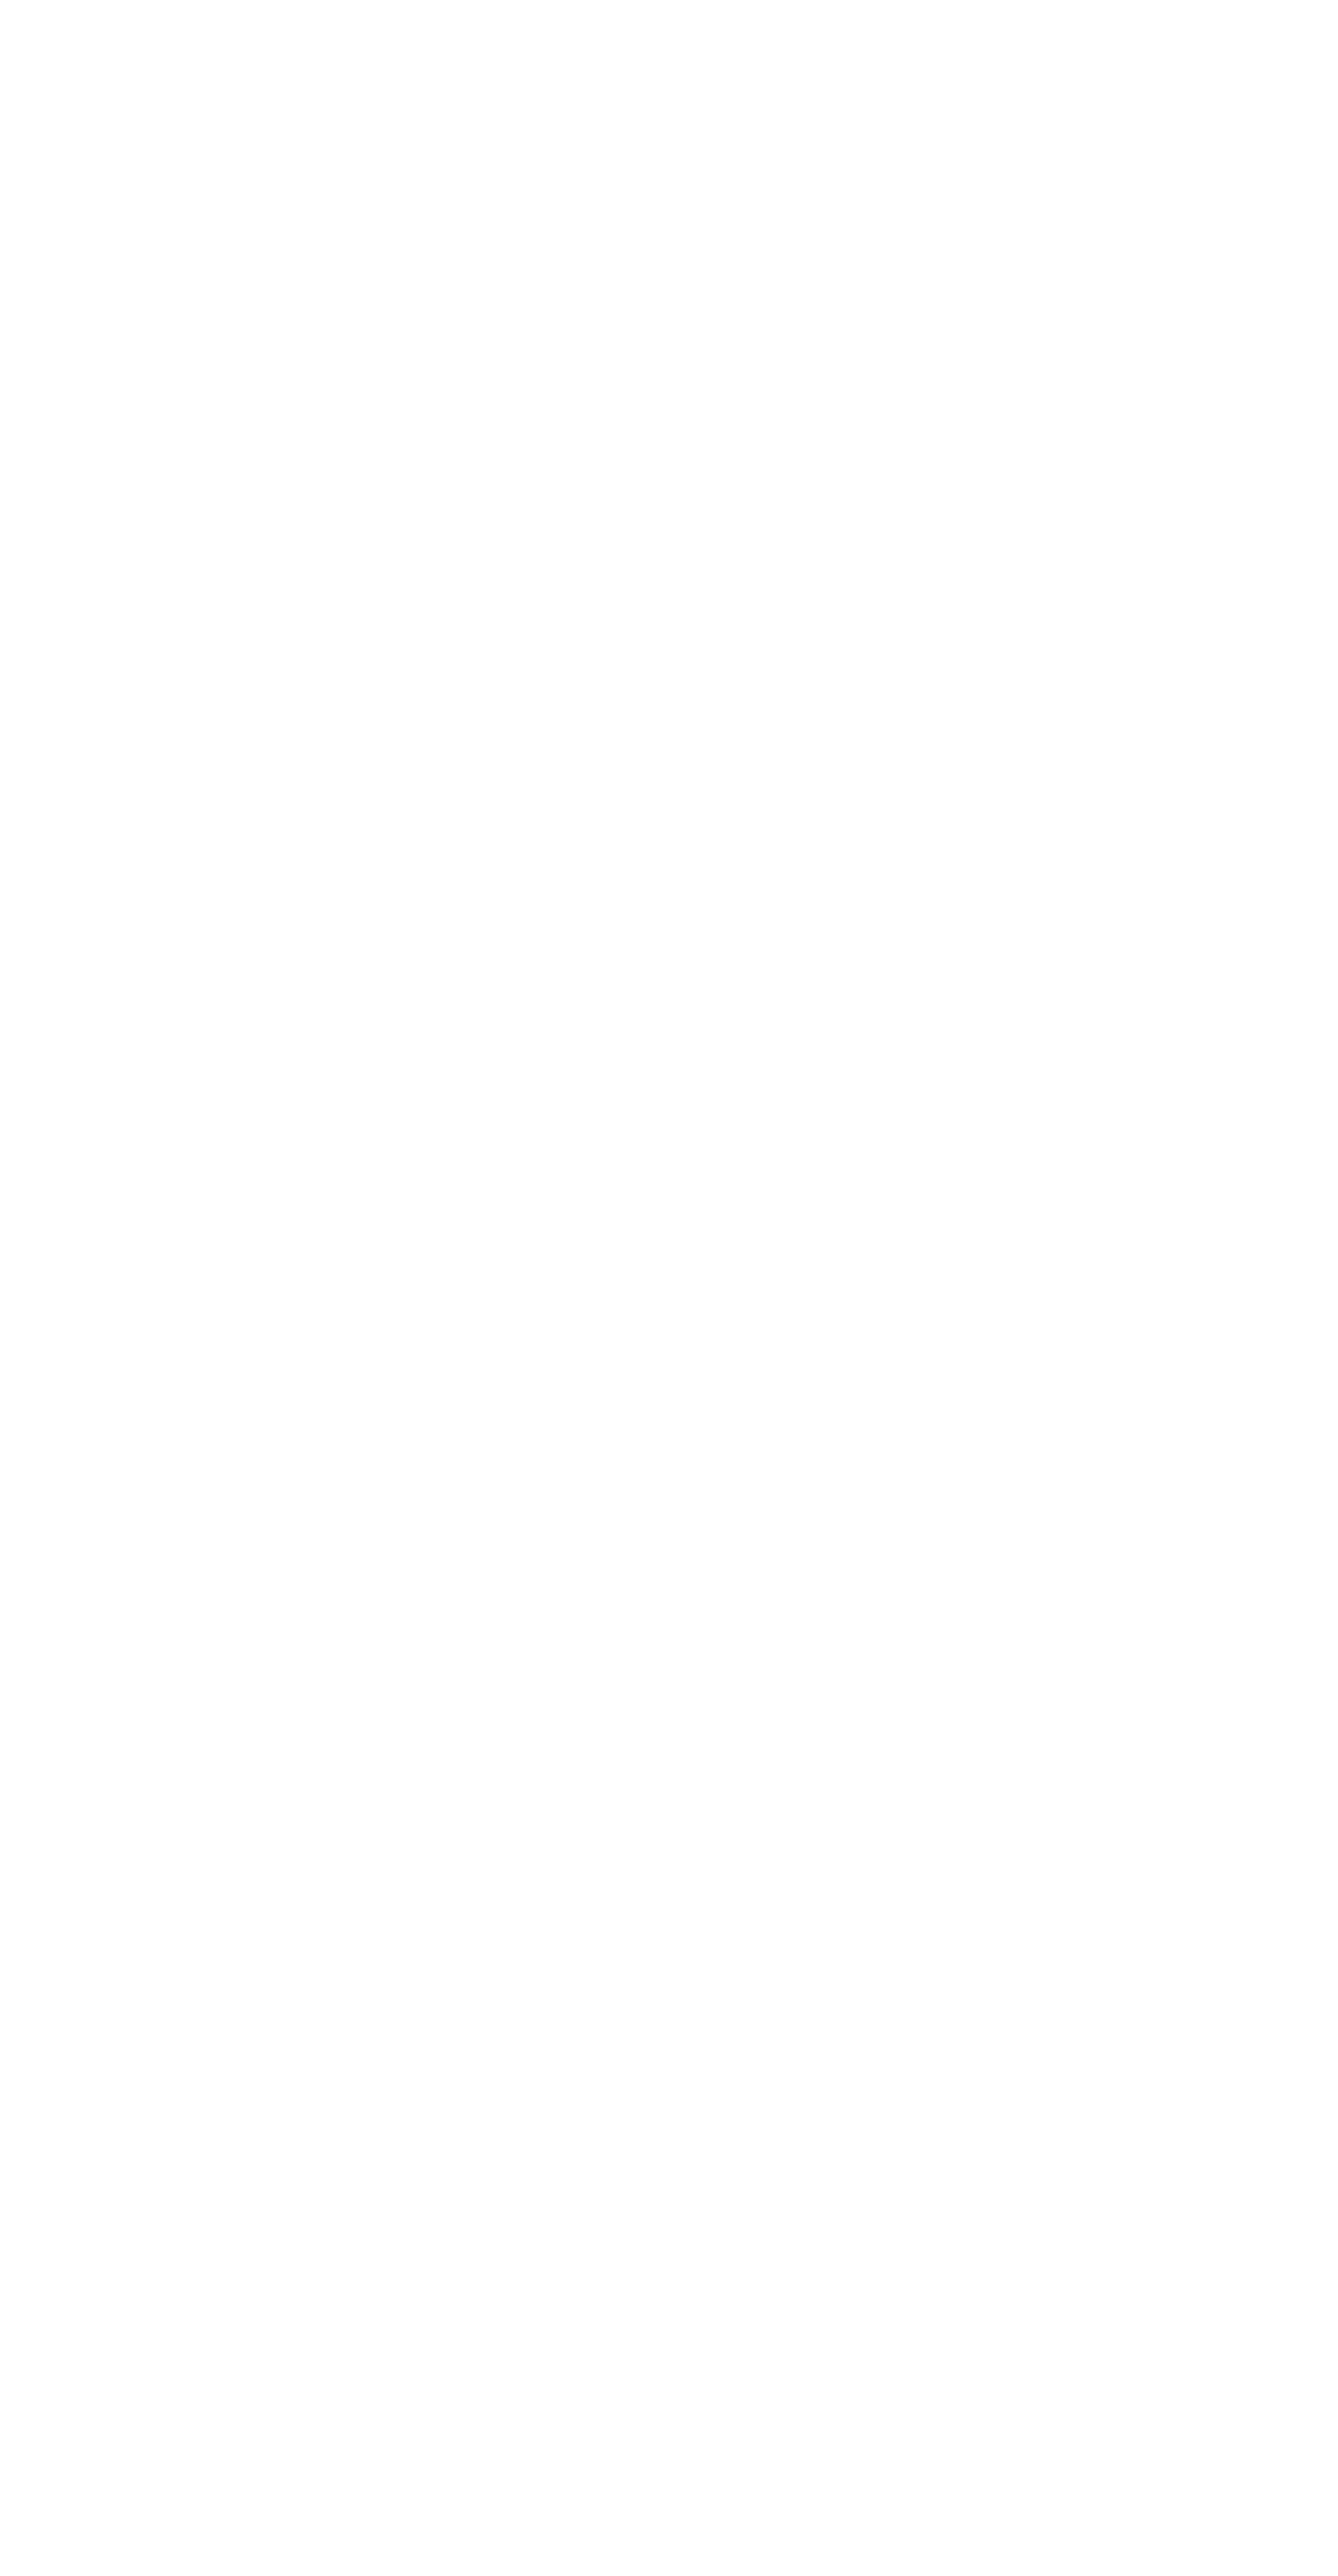

In [30]:


plotter.histogram_summary(datasets_by_input_dim)
#plotter.box_summary(datasets_by_input_dim)


In [ ]:
for dataset in benchmarks.list_datasets():
    plotter.histogram_by_dataset(dataset)
    plotter.box_by_dataset(dataset)

In [ ]:
hp = ['units', 'spectral radius', 'connectivity', 'G.S.R.', 'bias scaling', 'input scaling', 'leaky', 'learning', 'partition']
for dataset in benchmarks.list_datasets():
    for model in benchmarks.list_models():
        plotter.hp_table_by_model(dataset, model, hp)